In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


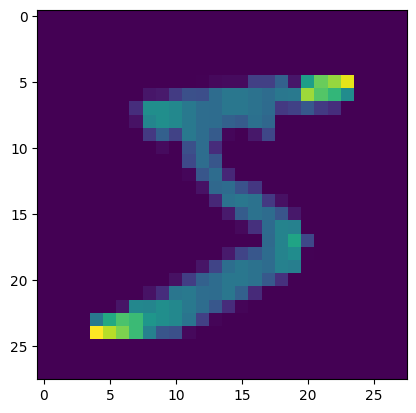

5


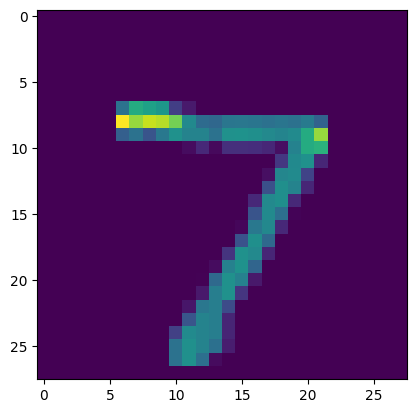

7


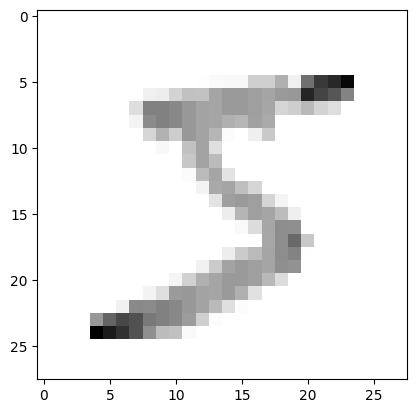

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
print(y_train[0])
plt.imshow(x_test[0])
plt.show()
print(y_test[0])
plt.imshow(x_train[0],cmap=plt.cm.binary)

**Checking the value of each pixel,Before Normaliztion**

In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

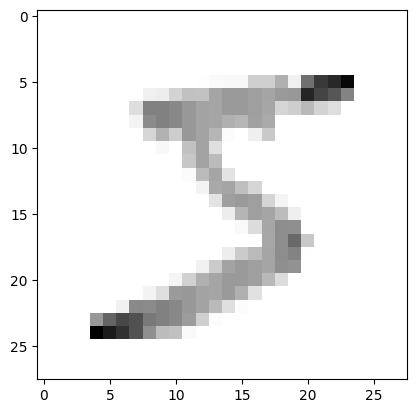

In [ ]:
#in order to normalize it
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)


In [ ]:
#After Normalize
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(y_train[0])

5


In [ ]:
import numpy as np
IMG_SIZE = 28
x_train = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


*Creating a Deep Neural Network
Training on 60,000 samples of MNIST handwritten dataset**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
##Creating a Neural Network now
model = Sequential()


##First Convolution Layer
model.add(Conv2D(64, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

##Second Convolution Layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

##3rd Convolutin Layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


##Fully Connected Layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

##Fully Connected Layer 2
model.add(Dense(32))
model.add(Activation('relu'))

##Last Fully Connected Layer
model.add(Dense(10))
model.add(Activation('softmax'))

##Output Layer
#model.add(Dense(1))
#model.add(Activation('sigmoid'))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [ ]:
print(len(x_train))

60000


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

 *Training my model*

In [ ]:
model.fit(x_train,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 73s 54ms/step - loss: 0.3297 - accuracy: 0.8972 - val_loss: 0.1487 - val_accuracy: 0.9553
Epoch 2/5
1313/1313 [==============================] - 68s 52ms/step - loss: 0.1060 - accuracy: 0.9674 - val_loss: 0.1007 - val_accuracy: 0.9692
Epoch 3/5
1313/1313 [==============================] - 67s 51ms/step - loss: 0.0754 - accuracy: 0.9771 - val_loss: 0.0893 - val_accuracy: 0.9740
Epoch 4/5
1313/1313 [==============================] - 67s 51ms/step - loss: 0.0619 - accuracy: 0.9812 - val_loss: 0.0752 - val_accuracy: 0.9763
Epoch 5/5
1313/1313 [==============================] - 71s 54ms/step - loss: 0.0488 - accuracy: 0.9843 - val_loss: 0.0604 - val_accuracy: 0.9818


***Evaluateing on testing data set MNIT***

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 4s 13ms/step - loss: 0.0577 - accuracy: 0.9823
Test accuracy: 0.9822999835014343
Test loss: 0.05770563334226608


In [ ]:
predicions = model.predict(x_test)
print(predicions)

313/313 [==============================] - 4s 13ms/step
[[1.03922968e-08 3.64206709e-09 4.44607849e-06 ... 9.99995410e-01
  7.78850096e-10 4.55859457e-08]
 [4.74338776e-05 2.63987999e-06 9.99870300e-01 ... 3.87336240e-06
  1.62075230e-05 1.11212021e-05]
 [2.63864365e-07 9.99950707e-01 1.43716234e-05 ... 7.36260154e-06
  5.15168267e-06 6.03053365e-07]
 ...
 [8.58141114e-09 1.52142441e-08 1.74849435e-09 ... 5.78251438e-08
  4.89943659e-07 2.92643404e-06]
 [1.10830138e-06 5.68711434e-09 6.26685869e-06 ... 6.40280149e-08
  8.19967943e-04 6.84428669e-05]
 [3.22471897e-05 1.43049155e-08 2.02548745e-05 ... 5.85098370e-09
  1.14072946e-05 5.83294657e-08]]


In [ ]:
print(np.argmax(predicions[0]))

7


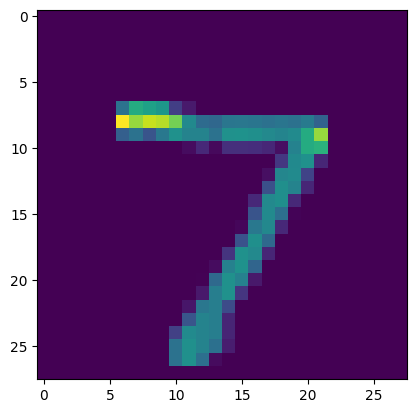

In [ ]:
plt.imshow(x_test[0])
plt.show()

In [ ]:
print(np.argmax(predicions[145]))

1


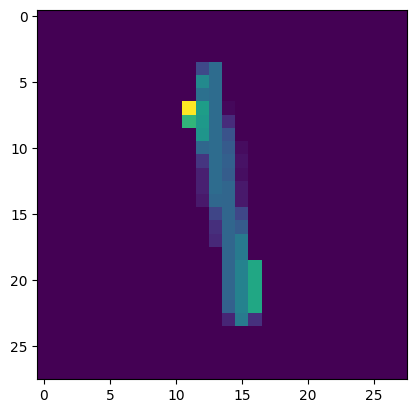

In [ ]:
plt.imshow(x_test[145])
plt.show()

In [ ]:
import cv2

In [ ]:
img=cv2.imread('/content/drive/MyDrive/TNRD/IMAGEprossing/a8822486-4042-4e9f-b122-7e9ed99e5089.jpg')

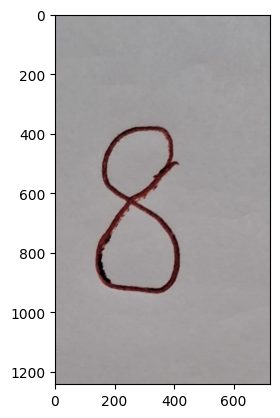

In [ ]:
plt.imshow(img)

In [ ]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
resized= cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [ ]:
newimg = tf.keras.utils.normalize(resized, axis=1)

In [ ]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
newimg.shape

(1, 28, 28, 1)

In [ ]:
predicions  = model.predict(newimg)
print(np.argmax(predicions))

1/1 [==============================] - 0s 21ms/step
0


**CNN Model on MNIST Dataset for written digit classification*** *italicized text*

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#Normalize
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(x_train, y_train, epochs=3)
model.save('epic_num_reader.model')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2593 - accuracy: 0.9236
Epoch 2/3
1875/1875 [========================

In [ ]:
loss,accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0982 - accuracy: 0.9705
0.09816556423902512
0.9704999923706055


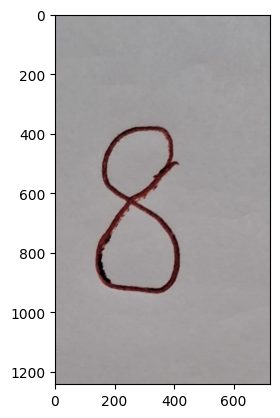

In [ ]:
import cv2
img=cv2.imread('/content/drive/MyDrive/TNRD/IMAGEprossing/a8822486-4042-4e9f-b122-7e9ed99e5089.jpg')
plt.imshow(img)

In [ ]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
resized= cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [ ]:
newimg = tf.keras.utils.normalize(resized, axis=1)

In [ ]:
newimg = np.array(newimg).reshape(-1, 28, 28, 1)
newimg.shape

(1, 28, 28, 1)

In [ ]:
predicions  = model.predict(newimg)
print(np.argmax(predicions))

1/1 [==============================] - 0s 91ms/step
8


**How to Build CNN Model**

In [ ]:
def build_model(hp):
  model=keras.Sequintial([
      keras.layers.Conv2D(
          filters=hp.Int('conv_1_filter',min_value=32,max_value=128,step=16),
          kernel_size=hp.Choise('conv_1_kernel',values=[3,5]),
          activation='relu',
          input_shape=(28,28,1)
      ),
      keras.layers.Conv2D(
          filters=hp.Int('conv_1_filter',min_value=32,max_value=64,step=16),
          kernel_size=hp.Choise('conv_1_kernel',values=[3,5]),
          activation='relu',
          input_shape=(28,28,1)
      ),
      keras.layers.Flatten(),
      keras.layers.Dense(
          units=hp.Int('dense_1_units',min_value=32,max_value=128,step=16),
          activation='relu'
      ),
      keras.layers.Dense(10,activaton='softmax')
  ])

  ##now we have to compile model
  model.compile(optimizer=keras.optimizers.Adam(hp.Choise('learning_rate',values=[1e-2,1e-3])),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model


**image recognition using CNN on CIFAR-10 Dataset**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


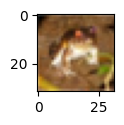

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(x_train[0])

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train[0] #so we normalize 0 to 1

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

**ANN**

In [ ]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(10,activation='softmax')
])
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 147s 94ms/step - loss: 1.8283 - accuracy: 0.3509
Epoch 2/5
1563/1563 [==============================] - 143s 91ms/step - loss: 1.6488 - accuracy: 0.4215
Epoch 3/5
1563/1563 [==============================] - 140s 90ms/step - loss: 1.5720 - accuracy: 0.4492
Epoch 4/5
1563/1563 [==============================] - 141s 90ms/step - loss: 1.5194 - accuracy: 0.4678
Epoch 5/5
1563/1563 [==============================] - 142s 91ms/step - loss: 1.4756 - accuracy: 0.4872


In [ ]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel()